# **CIFAR-10 Prototype**

Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.
https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cifar-10-python/cifar-10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar-10-python/cifar-10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar-10-python/cifar-10-python/cifar-10-batches-py/batches.meta
/kaggle/input/cifar-10-python/cifar-10-python/cifar-10-batches-py/test_batch
/kaggle/input/cifar-10-python/cifar-10-python/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar-10-python/cifar-10-python/cifar-10-batches-py/data_batch_5
/kaggle/input/cifar-10-python/cifar-10-python/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar-10-python/cifar-10-python/cifar-10-batches-py/readme.html


In [2]:
import pickle
def unpickle_data(file):
    with open(file, 'rb') as filereader:
        dict = pickle.load(filereader, encoding="bytes")
    return dict

In [3]:
import matplotlib.pyplot as plt

file_1 = '/kaggle/input/cifar-10-python/cifar-10-python/cifar-10-batches-py/data_batch_1'
data_1_dict = unpickle_data(file_1)

file_2 = '/kaggle/input/cifar-10-python/cifar-10-python/cifar-10-batches-py/data_batch_2'
data_2_dict = unpickle_data(file_2)

file_3 = '/kaggle/input/cifar-10-python/cifar-10-python/cifar-10-batches-py/data_batch_3'
data_3_dict = unpickle_data(file_3)

file_4 = '/kaggle/input/cifar-10-python/cifar-10-python/cifar-10-batches-py/data_batch_4'
data_4_dict = unpickle_data(file_4)

file_5 = '/kaggle/input/cifar-10-python/cifar-10-python/cifar-10-batches-py/data_batch_5'
data_5_dict = unpickle_data(file_5)

keys_list = list(data_1_dict.keys())

print(keys_list)

[b'batch_label', b'labels', b'data', b'filenames']


In [4]:
print(data_1_dict[b'data'].shape)
print(data_1_dict[b'filenames'][4])


(10000, 3072)
b'station_wagon_s_000293.png'


<class 'numpy.ndarray'>


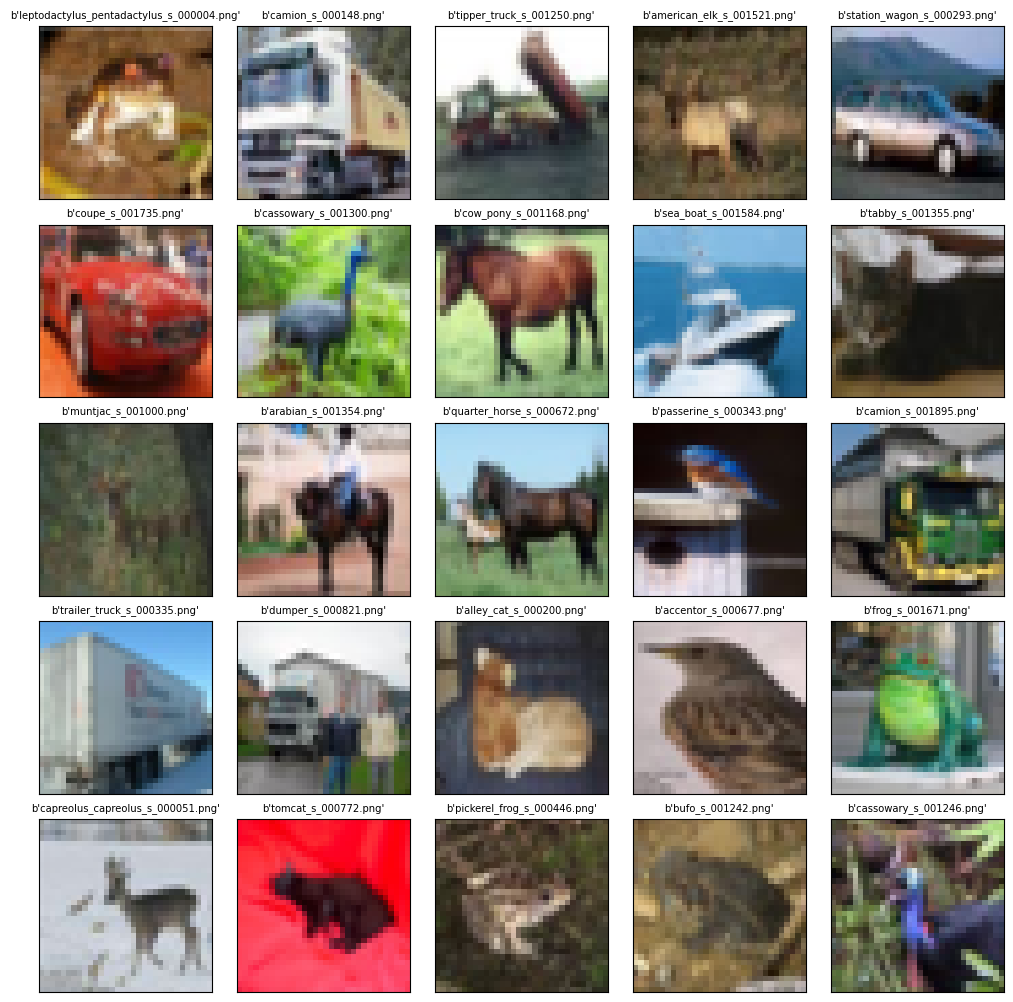

In [5]:
plot_data = np.asarray(data_1_dict[b'data'], dtype=np.float32)
print(type(plot_data))

fig = plt.figure(figsize=(10,10));plt.rcParams["font.size"] = 6; plt.rcParams["font.weight"] = "bold"
for i in range(0, 25):
    ax = plt.subplot(5, 5, i+1)
    img = data_1_dict[b'data'][i]
    img = img.reshape(3,32,32).transpose(1,2,0)
    ax.imshow(img)
    ax.set_title(data_1_dict[b'filenames'][i])
    ax.set_xticks([]); ax.set_yticks([])
fig.tight_layout();fig.show()

In [6]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

X_1 = data_1_dict[b'data'].reshape(-1,3,32,32).transpose(0,2,3,1)
y_1 = np.array(data_1_dict[b'labels'], dtype=np.float32).reshape(-1,1)

X_2 = data_2_dict[b'data'].reshape(-1,3,32,32).transpose(0,2,3,1)
y_2 = np.array(data_2_dict[b'labels'], dtype=np.float32).reshape(-1,1)

X_3 = data_3_dict[b'data'].reshape(-1,3,32,32).transpose(0,2,3,1)
y_3 = np.array(data_3_dict[b'labels'], dtype=np.float32).reshape(-1,1)

X_4 = data_4_dict[b'data'].reshape(-1,3,32,32).transpose(0,2,3,1)
y_4 = np.array(data_4_dict[b'labels'], dtype=np.float32).reshape(-1,1)

X_5 = data_5_dict[b'data'].reshape(-1,3,32,32).transpose(0,2,3,1)
y_5 = np.array(data_5_dict[b'labels'], dtype=np.float32).reshape(-1,1)

X = np.concatenate((X_1, X_2, X_3, X_4, X_5), axis = 0)
y = np.concatenate((y_1, y_2, y_3, y_4, y_5), axis = 0)
print(X.shape, y.shape)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 0)
print(X_train.shape, y_train.shape, X_val[0].shape, y_val.shape)

X_train = X_train / 255
X_val = X_val / 255
# y_train = y_train / 255
# y_val = y_val / 255

2024-08-11 13:32:35.316574: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 13:32:35.316672: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 13:32:35.427133: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


(50000, 32, 32, 3) (50000, 1)
(45000, 32, 32, 3) (45000, 1) (32, 32, 3) (5000, 1)


In [7]:
def cnn_model(X_train, y_train, X_val, y_val, n_cnn_layers, n_epochs):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input((32,32,3)))
    l2_reg = tf.keras.regularizers.L2(l2=0.001)
    
    for i in range(0, n_cnn_layers):
        model.add(tf.keras.layers.Conv2D(filters=32*(i+1), kernel_size=(3, 3), activation='relu', kernel_regularizer=l2_reg, padding='same'))
        model.add(tf.keras.layers.BatchNormalization())
        
        model.add(tf.keras.layers.Conv2D(filters=32*(i+1), kernel_size=(3, 3), activation='relu', kernel_regularizer=l2_reg, padding='same'))
        
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPooling2D((2, 2)))
        model.add(tf.keras.layers.Dropout(0.3))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2_reg))
    model.add(tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=l2_reg))
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.sparse_categorical_crossentropy,
        metrics=['accuracy']
    )

    history = model.fit(
        X_train,
        y_train,
        epochs=n_epochs,
        validation_data=(X_val, y_val)
    )
    
    return model, history


In [8]:
cifar_10_model, history = cnn_model(X_train, y_train, X_val, y_val, 4, 50)

Epoch 1/50
  20/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1124 - loss: 4.4112

I0000 00:00:1723383187.101883      75 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1723383187.129621      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3675 - loss: 2.7189

W0000 00:00:1723383207.787551      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.3676 - loss: 2.7186 - val_accuracy: 0.4022 - val_loss: 2.4461
Epoch 2/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6089 - loss: 1.6918 - val_accuracy: 0.6926 - val_loss: 1.3467
Epoch 3/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6755 - loss: 1.3828 - val_accuracy: 0.6874 - val_loss: 1.3392
Epoch 4/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7127 - loss: 1.2598 - val_accuracy: 0.7064 - val_loss: 1.3227
Epoch 5/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7248 - loss: 1.2290 - val_accuracy: 0.7272 - val_loss: 1.2250
Epoch 6/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7428 - loss: 1.1971 - val_accuracy: 0.7288 - val_loss: 1.2663
Epoch 7/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7557 - loss: 1.1824 - val_accuracy: 0.7630 - val_loss: 1.1768
Epoch 8/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7561 - loss: 1.1810 - val_accur

In [9]:
cifar_10_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 96)       │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 96)       │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 96)       │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 96)       │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 128)      │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,793,728 (6.84 MB)

 Trainable params: 597,482 (2.28 MB)

 Non-trainable params: 1,280 (5.00 KB)

 Optimizer params: 1,194,966 (4.56 MB)

In [10]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist = hist[1:]

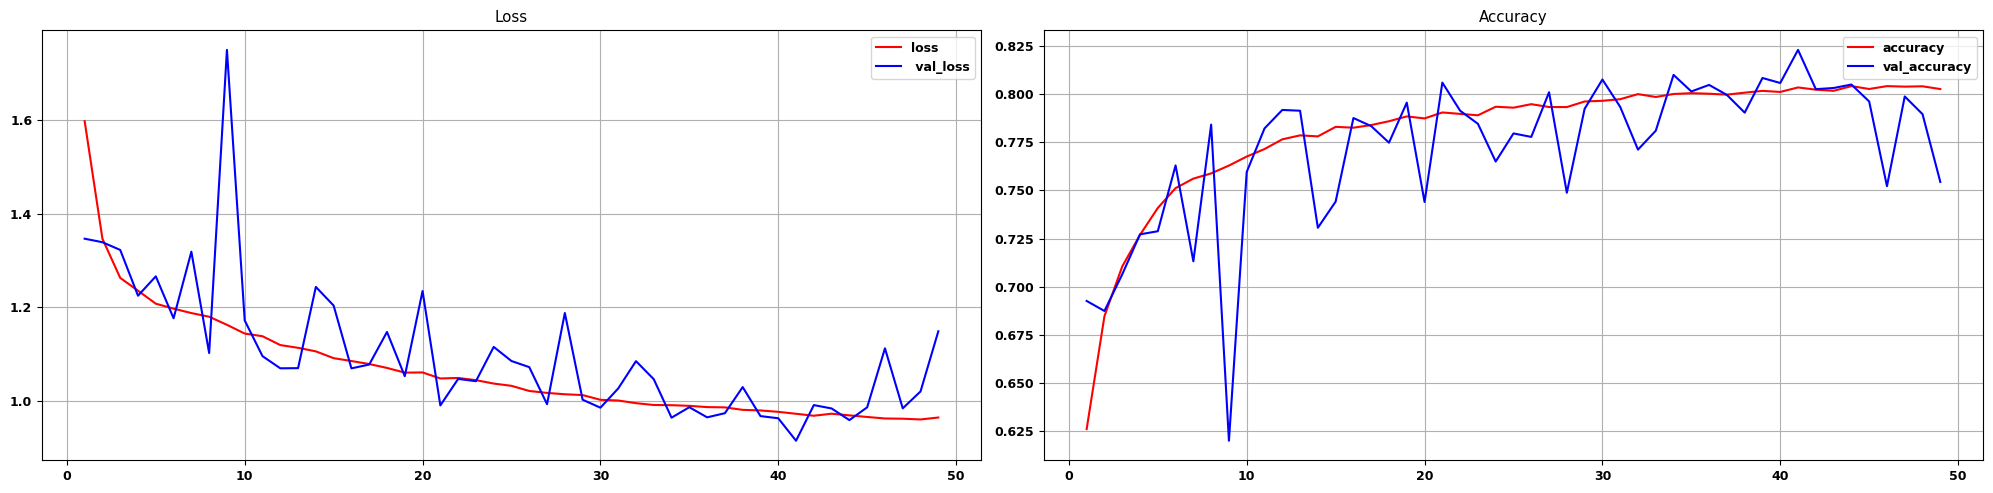

In [11]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["font.size"] = 9
plt.rcParams["font.weight"] = "bold"
fig, axs = plt.subplots(nrows = 1, ncols = 2)

axs[0].plot(hist['epoch'], hist['loss'], label="loss", color='red')
axs[0].plot(hist['epoch'], hist['val_loss'],label=" val_loss", color='blue')
axs[0].set_title('Loss'); axs[0].grid(True)
axs[0].legend()

axs[1].plot(hist['epoch'], hist['accuracy'], label="accuracy", color='red')
axs[1].plot(hist['epoch'], hist['val_accuracy'], label="val_accuracy", color='blue')
axs[1].set_title('Accuracy'); axs[1].grid(True)
axs[1].legend()
fig.tight_layout(); plt.show()



In [12]:
test_file = '/kaggle/input/cifar-10-python/cifar-10-python/cifar-10-batches-py/test_batch'
test_dict = unpickle_data(test_file)
test_keys = list(test_dict.keys())

print(test_keys)

X_test = test_dict[b'data'].reshape(-1,3,32,32).transpose(0,2,3,1)
y_test = np.array(test_dict[b'labels'], dtype=np.float32)#.reshape(-1,1)
X_test = X_test / 255

print(X_test.shape)
print(y_test.shape)

[b'batch_label', b'labels', b'data', b'filenames']
(10000, 32, 32, 3)
(10000,)


In [13]:
y_predicted_by_model = cifar_10_model.predict(X_test)

y_pred = [np.argmax(y) for y in y_predicted_by_model]
y_pred = np.array(y_pred)
acc = sum((y_pred == y_test)) / len(y_test)
print("accuracy = ", acc*100,"%")

 75/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1723383602.990392      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
accuracy =  75.11 %
